In [2]:
import json
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from src.inout.load_omop import OMOP_data


In [3]:
csv_folder_path = './data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9/1_omop_data_csv'

with open('./data/OMOP_structure_and_types/OMOPCDM_5.3_structure.json', 'r') as f:
    tables_structure = json.load(f)
    
omop_db = OMOP_data(csv_data_path=csv_folder_path, tables_structure=tables_structure)

Ingesting clinical_tables:
Ingesting table person.
Ingesting file ./data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9/1_omop_data_csv/person.csv was successful.
Ingesting table observation_period.
Ingesting file ./data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9/1_omop_data_csv/observation_period.csv was successful.
Ingesting table death.
Ingesting file ./data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9/1_omop_data_csv/death.csv was successful.
Ingesting table visit_occurrence.
Ingesting file ./data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9/1_omop_data_csv/visit_occurrence.csv was successful.
Ingesting table visit_detail.
Ingesting file ./data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9/1_omop_data_csv/visit_detail.csv was successful.
Ingesting table condition_occurrence.
Ingesting file ./data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9/1_omop_data_csv/condition_occurrence.csv was successful.
Ingesting table drug_exposure.
Ingestin

In [4]:
from icdmappings import Mapper, Validator

mapper = Mapper()
validator = Validator()

In [5]:
list(validator.validate(list(map(str.strip, omop_db.clinical_tables.condition_occurrence['condition_source_value'].tolist())),
                           expects='icd10_diagnostic')).count(True)

1890

In [6]:
len(list(map(str.strip, omop_db.clinical_tables.condition_occurrence['condition_source_value'].tolist())))

16441

In [7]:
omop_db.clinical_tables.condition_occurrence['ccsr_code'] = omop_db.clinical_tables.condition_occurrence['condition_source_value'].apply(lambda x: mapper.map(x.strip(), 
                                                                                                                                                              source='icd10', 
                                                                                                                                                              target='ccsr'))

In [8]:
omop_db.clinical_tables.condition_occurrence['icd10_chapters'] = omop_db.clinical_tables.condition_occurrence['condition_source_value'].apply(lambda x: mapper.map(x.strip(), 
                                                                                                                                                                   source='icd10', 
                                                                                                                                                                   target='chapter'))

In [9]:
omop_db.clinical_tables.condition_occurrence['icd10_chapters'][omop_db.clinical_tables.condition_occurrence['icd10_chapters'].notnull()].value_counts()

icd10_chapters
4     437
9     393
5     168
18    141
11    117
3     112
10    106
14    104
6      75
13     69
19     64
21     58
1      58
20     51
2      51
12     26
7      15
17      3
8       2
Name: count, dtype: int64

In [10]:
omop_db.clinical_tables.condition_occurrence

,condition_occurrence_id,person_id,condition_concept_id,condition_start_date,condition_start_datetime,condition_end_date,condition_end_datetime,condition_type_concept_id,stop_reason,provider_id,visit_occurrence_id,visit_detail_id,condition_source_value,condition_source_concept_id,condition_status_source_value,condition_status_concept_id,ccsr_code,icd10_chapters
0,7000818053728441484,1741351032930224901,196523,2179-07-24,2179-07-24 18:21:00,2179-07-28,2179-07-28 15:54:00,32821,<NA>,<NA>,-5779522865065417426,<NA>,78791,44824628,<NA>,<NA>,None,None
1,-3514320024333679102,1741351032930224901,436659,2179-07-24,2179-07-24 18:21:00,2179-07-28,2179-07-28 15:54:00,32821,<NA>,<NA>,-5779522865065417426,<NA>,2809,44828816,<NA>,<NA>,None,None
2,-6297447354934110463,1741351032930224901,435515,2179-07-24,2179-07-24 18:21:00,2179-07-28,2179-07-28 15:54:00,32821,<NA>,<NA>,-5779522865065417426,<NA>,2761,44822952,<NA>,<NA>,None,None
3,3131132784874295309,1741351032930224901,436096,2179-07-24,2179-07-24 18:21:00,2179-07-28,2179-07-28 15:54:00,32821,<NA>,<NA>,-5779522865065417426,<NA>,33829,44834629,<NA>,<NA>,None,None
4,2246709778332812674,1741351032930224901,440383,2179-07-24,2179-07-24 18:21:00,2179-07-28,2179-07-28 15:54:00,32821,<NA>,<NA>,-5779522865065417426,<NA>,311,44833421,<NA>,<NA>,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16436,5160751222712405682,-1210657672714831684,4064452,2134-01-01,2134-01-01 08:00:00,2134-01-01,2134-01-01 08:00:00,32817,<NA>,<NA>,-3312868479314057914,<NA>,AF (Atrial Fibrillation),2000031019,<NA>,<NA>,None,None
16437,7817722518091634880,-1210657672714831684,4064452,2134-01-01,2134-01-01 12:00:00,2134-01-01,2134-01-01 12:00:00,32817,<NA>,<NA>,-3312868479314057914,<NA>,AF (Atrial Fibrillation),2000031019,<NA>,<NA>,None,None
16438,5631597446422224513,-1210657672714831684,4064452,2134-01-01,2134-01-01 14:00:00,2134-01-01,2134-01-01 14:00:00,32817,<NA>,<NA>,-3312868479314057914,<NA>,AF (Atrial Fibrillation),2000031019,<NA>,<NA>,None,None
16439,8817407860694965134,-1210657672714831684,4064452,2134-01-01,2134-01-01 13:00:00,2134-01-01,2134-01-01 13:00:00,32817,<NA>,<NA>,-3312868479314057914,<NA>,AF (Atrial Fibrillation),2000031019,<NA>,<NA>,None,None


### Now joining with visit ocurrences

In [11]:
visit_condition_df = omop_db.clinical_tables.condition_occurrence[['condition_source_value','visit_occurrence_id']]\
    .join(
        omop_db.clinical_tables.visit_occurrence[['visit_occurrence_id','visit_start_date']]\
    .set_index('visit_occurrence_id'),
        on='visit_occurrence_id',
        rsuffix='_visit'
        )

In [12]:
visit_condition_df['ccsr_code'] = visit_condition_df['condition_source_value'].apply(lambda x: mapper.map(x.strip(), 
                                                                                                        source='icd10', 
                                                                                                        target='ccsr'))
visit_condition_df['icd10_chapters'] = visit_condition_df['condition_source_value'].apply(lambda x: mapper.map(x.strip(), 
                                                                                                        source='icd10', 
                                                                                                        target='chapter'))
                                        

In [13]:
visit_condition_df

,condition_source_value,visit_occurrence_id,visit_start_date,ccsr_code,icd10_chapters
0,78791,-5779522865065417426,2179-07-24,None,None
1,2809,-5779522865065417426,2179-07-24,None,None
2,2761,-5779522865065417426,2179-07-24,None,None
3,33829,-5779522865065417426,2179-07-24,None,None
4,311,-5779522865065417426,2179-07-24,None,None
...,...,...,...,...,...
16436,AF (Atrial Fibrillation),-3312868479314057914,2133-12-18,None,None
16437,AF (Atrial Fibrillation),-3312868479314057914,2133-12-18,None,None
16438,AF (Atrial Fibrillation),-3312868479314057914,2133-12-18,None,None
16439,AF (Atrial Fibrillation),-3312868479314057914,2133-12-18,None,None


In [14]:
visit_condition_df[visit_condition_df['ccsr_code'].notnull()]

,condition_source_value,visit_occurrence_id,visit_start_date,ccsr_code,icd10_chapters
75,E785,5773706737162663913,2169-01-14,END010,4
76,I6032,5773706737162663913,2169-01-14,CIR021,9
77,I2510,5773706737162663913,2169-01-14,CIR011,9
78,I10,5773706737162663913,2169-01-14,CIR007,9
79,E780,5773706737162663913,2169-01-14,END010,4
...,...,...,...,...,...
3984,F05,-3342990089983663400,2147-12-30,NVS011,5
3985,F329,-3342990089983663400,2147-12-30,MBD002,5
3986,J95851,-3342990089983663400,2147-12-30,RSP002,10
3987,S240XXA,-3342990089983663400,2147-12-30,INJ009,19


In [15]:
visit_condition_df[visit_condition_df['icd10_chapters'].notnull() & visit_condition_df['ccsr_code'].notnull()]

,condition_source_value,visit_occurrence_id,visit_start_date,ccsr_code,icd10_chapters
75,E785,5773706737162663913,2169-01-14,END010,4
76,I6032,5773706737162663913,2169-01-14,CIR021,9
77,I2510,5773706737162663913,2169-01-14,CIR011,9
78,I10,5773706737162663913,2169-01-14,CIR007,9
79,E780,5773706737162663913,2169-01-14,END010,4
...,...,...,...,...,...
3984,F05,-3342990089983663400,2147-12-30,NVS011,5
3985,F329,-3342990089983663400,2147-12-30,MBD002,5
3986,J95851,-3342990089983663400,2147-12-30,RSP002,10
3987,S240XXA,-3342990089983663400,2147-12-30,INJ009,19


In [16]:
def monthly_freq_tables(target_df:pd.DataFrame, target_column:str) -> pd.DataFrame:
    monthly_visit_condition_count_df = target_df.groupby([pd.Grouper(key='visit_start_date',freq='ME'),target_column])[target_column].count().reset_index(name='count')
    monthly_visit_condition_count_df['year'] = monthly_visit_condition_count_df['visit_start_date'].dt.year 
    monthly_visit_condition_count_df['month'] = monthly_visit_condition_count_df['visit_start_date'].dt.month
    monthly_visit_condition_count_df.sort_values(by='visit_start_date')
    abs_freq_table = monthly_visit_condition_count_df.pivot(index=['year', 'month', 'visit_start_date'], 
                                                            columns=target_column,
                                                            values='count').fillna(0).astype('int')#, downcast='infer')
    rel_freq_table = abs_freq_table.div(abs_freq_table.sum(axis=1), axis= 0)
    rel_freq_table.reset_index(level=['visit_start_date'],inplace=True)
    abs_freq_table.reset_index(level=['visit_start_date'],inplace=True)
    return abs_freq_table, rel_freq_table

In [17]:
from typing import Literal


def period_freq_tables(target_df:pd.DataFrame, target_column:str, period: Literal['Y', 'ME', 'W', 'D'], date_column:str='visit_start_date') -> tuple[pd.DataFrame, pd.DataFrame]:
    if period not in ['Y', 'ME', 'W', 'D']:
        raise ValueError("period must be one of 'Y', 'ME', 'W', 'D'")
    
    period_target_count_df = target_df.groupby([pd.Grouper(key=date_column,freq=period),target_column])[target_column].count().reset_index(name='count')
    period_target_count_df['year'] = period_target_count_df[date_column].dt.year
    index = ['year']
    if period != 'Y':
        period_target_count_df['month'] = period_target_count_df[date_column].dt.month
        index.append('month')
        if period != 'ME':
            period_target_count_df['week'] = period_target_count_df[date_column].dt.isocalendar().week
            index.append('month')
            if period != 'W':
                period_target_count_df['day'] = period_target_count_df[date_column].dt.day
                index.append('day')
    index.append(date_column)
    period_target_count_df.sort_values(by=date_column)
    abs_freq_table = period_target_count_df.pivot(index=index, 
                                                columns=target_column,
                                                values='count').fillna(0).astype('int')
    rel_freq_table = abs_freq_table.div(abs_freq_table.sum(axis=1), axis= 0)
    rel_freq_table.reset_index(level=[date_column],inplace=True)
    abs_freq_table.reset_index(level=[date_column],inplace=True)
    return abs_freq_table, rel_freq_table
    
    

In [18]:
visit_condition_df[visit_condition_df['ccsr_code'].notnull()]

,condition_source_value,visit_occurrence_id,visit_start_date,ccsr_code,icd10_chapters
75,E785,5773706737162663913,2169-01-14,END010,4
76,I6032,5773706737162663913,2169-01-14,CIR021,9
77,I2510,5773706737162663913,2169-01-14,CIR011,9
78,I10,5773706737162663913,2169-01-14,CIR007,9
79,E780,5773706737162663913,2169-01-14,END010,4
...,...,...,...,...,...
3984,F05,-3342990089983663400,2147-12-30,NVS011,5
3985,F329,-3342990089983663400,2147-12-30,MBD002,5
3986,J95851,-3342990089983663400,2147-12-30,RSP002,10
3987,S240XXA,-3342990089983663400,2147-12-30,INJ009,19


In [19]:
cccr_abs_freq, cccr_rel_freq = monthly_freq_tables(visit_condition_df[visit_condition_df['ccsr_code'].notnull() & visit_condition_df['icd10_chapters'].notnull()], 'ccsr_code')

In [20]:
# cccr_rel_freq.reset_index(level=['visit_start_date'],inplace=True)

KeyError: 'Level visit_start_date not found'

In [21]:
cccr_rel_freq

ccsr_code  visit_start_date  BLD001  BLD002    BLD003  BLD004    BLD006  \
year month                                                                
2113 8           2113-08-31     0.0     0.0  0.000000     0.0  0.000000   
     9           2113-09-30     0.0     0.0  0.000000     0.0  0.000000   
2115 11          2115-11-30     0.0     0.0  0.000000     0.0  0.076923   
2116 2           2116-02-29     0.0     0.0  0.037037     0.0  0.074074   
2117 3           2117-03-31     0.0     0.0  0.000000     0.0  0.000000   
...                     ...     ...     ...       ...     ...       ...   
2198 4           2198-04-30     0.0     0.0  0.000000     0.0  0.000000   
2199 2           2199-02-28     0.0     0.0  0.000000     0.0  0.000000   
2200 6           2200-06-30     0.0     0.0  0.000000     0.0  0.000000   
2201 2           2201-02-28     0.0     0.0  0.000000     0.0  0.000000   
     3           2201-03-31     0.0     0.0  0.000000     0.0  0.111111   

ccsr_code     BLD007    BLD008  BLD010  CIR001  ...    SYM005  SYM006  SYM007  \
year month                                      ...                             
2113 8      0.000000  0.000000     0.0     0.0  ...  0.047619  0.0000     0.0   
     9      0.000000  0.000000     0.0     0.0  ...  0.062500  0.0625     0.0   
2115 11     0.076923  0.000000     0.0     0.0  ...  0.000000  0.0000     0.0   
2116 2      0.037037  0.037037     0.0     0.0  ...  0.000000  0.0000     0.0   
2117 3      0.000000  0.000000     0.0     0.0  ...  0.000000  0.0000     0.0   
...              ...       ...     ...     ...  ...       ...     ...     ...   
2198 4      0.062500  0.000000     0.0     0.0  ...  0.000000  0.0000     0.0   
2199 2      0.000000  0.000000     0.0     0.0  ...  0.000000  0.0000     0.0   
2200 6      0.000000  0.000000     0.0     0.0  ...  0.000000  0.0000     0.0   
2201 2      0.000000  0.000000     0.0     0.0  ...  0.000000  0.0000     0.0   
     3      0.000000  0.000000     0.0     0.0  ...  0.000000  0.0000     0.0   

ccsr_code     SYM010  SYM011    SYM012    SYM013  SYM014  SYM016    SYM017  
year month                                                                  
2113 8      0.000000     0.0  0.095238  0.000000     0.0     0.0  0.000000  
     9      0.000000     0.0  0.062500  0.000000     0.0     0.0  0.000000  
2115 11     0.000000     0.0  0.000000  0.000000     0.0     0.0  0.076923  
2116 2      0.000000     0.0  0.000000  0.037037     0.0     0.0  0.000000  
2117 3      0.000000     0.0  0.000000  0.000000     0.0     0.0  0.000000  
...              ...     ...       ...       ...     ...     ...       ...  
2198 4      0.000000     0.0  0.000000  0.000000     0.0     0.0  0.000000  
2199 2      0.000000     0.0  0.000000  0.000000     0.0     0.0  0.000000  
2200 6      0.166667     0.0  0.000000  0.000000     0.0     0.0  0.000000  
2201 2      0.166667     0.0  0.000000  0.000000     0.0     0.0  0.000000  
     3      0.000000     0.0  0.000000  0.000000     0.0     0.0  0.000000  

[98 rows x 210 columns]

In [22]:
icd10_chapters_abs_freq, icd10_chapters_rel_freq = monthly_freq_tables(visit_condition_df[visit_condition_df['icd10_chapters'].notnull()], 'icd10_chapters')

In [23]:
icd10_chapters_rel_freq

icd10_chapters visit_start_date         1   10   11   12        13   14   17  \
year month                                                                     
2110 11              2110-11-30  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0   
2111 1               2111-01-31  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0   
2112 9               2112-09-30  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0   
     11              2112-11-30  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0   
     12              2112-12-31  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0   
...                         ...       ...  ...  ...  ...       ...  ...  ...   
2200 6               2200-06-30  0.166667  0.0  0.0  0.0  0.000000  0.0  0.0   
2201 2               2201-02-28  0.333333  0.0  0.0  0.0  0.000000  0.0  0.0   
     3               2201-03-31  0.222222  0.0  0.0  0.0  0.111111  0.0  0.0   
     10              2201-10-31  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0   
     12              2201-12-31  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0   

icd10_chapters        18        19    2   20        21         3         4  \
year month                                                                   
2110 11         0.000000  0.000000  0.0  0.0  0.000000  0.000000  1.000000   
2111 1          0.000000  0.000000  0.0  0.0  0.000000  0.000000  1.000000   
2112 9          0.000000  0.000000  0.0  0.5  0.000000  0.000000  0.500000   
     11         0.000000  0.000000  0.0  0.0  0.000000  0.000000  1.000000   
     12         0.000000  0.000000  0.0  0.0  0.000000  0.000000  1.000000   
...                  ...       ...  ...  ...       ...       ...       ...   
2200 6          0.166667  0.000000  0.0  0.0  0.166667  0.000000  0.166667   
2201 2          0.166667  0.000000  0.0  0.0  0.000000  0.000000  0.166667   
     3          0.222222  0.111111  0.0  0.0  0.000000  0.111111  0.000000   
     10         0.000000  0.000000  0.0  1.0  0.000000  0.000000  0.000000   
     12         0.000000  0.000000  0.0  1.0  0.000000  0.000000  0.000000   

icd10_chapters         5    6    7    8    9  
year month                                    
2110 11         0.000000  0.0  0.0  0.0  0.0  
2111 1          0.000000  0.0  0.0  0.0  0.0  
2112 9          0.000000  0.0  0.0  0.0  0.0  
     11         0.000000  0.0  0.0  0.0  0.0  
     12         0.000000  0.0  0.0  0.0  0.0  
...                  ...  ...  ...  ...  ...  
2200 6          0.333333  0.0  0.0  0.0  0.0  
2201 2          0.333333  0.0  0.0  0.0  0.0  
     3          0.222222  0.0  0.0  0.0  0.0  
     10         0.000000  0.0  0.0  0.0  0.0  
     12         0.000000  0.0  0.0  0.0  0.0  

[136 rows x 20 columns]

In [29]:
icd10_chapters_rel_freq.drop('visit_start_date', axis=1).astype('float').T.index.astype('int')

Index([1, 10, 11, 12, 13, 14, 17, 18, 19, 2, 20, 21, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='icd10_chapters')

<Axes: xlabel='year-month', ylabel='icd10_chapters'>

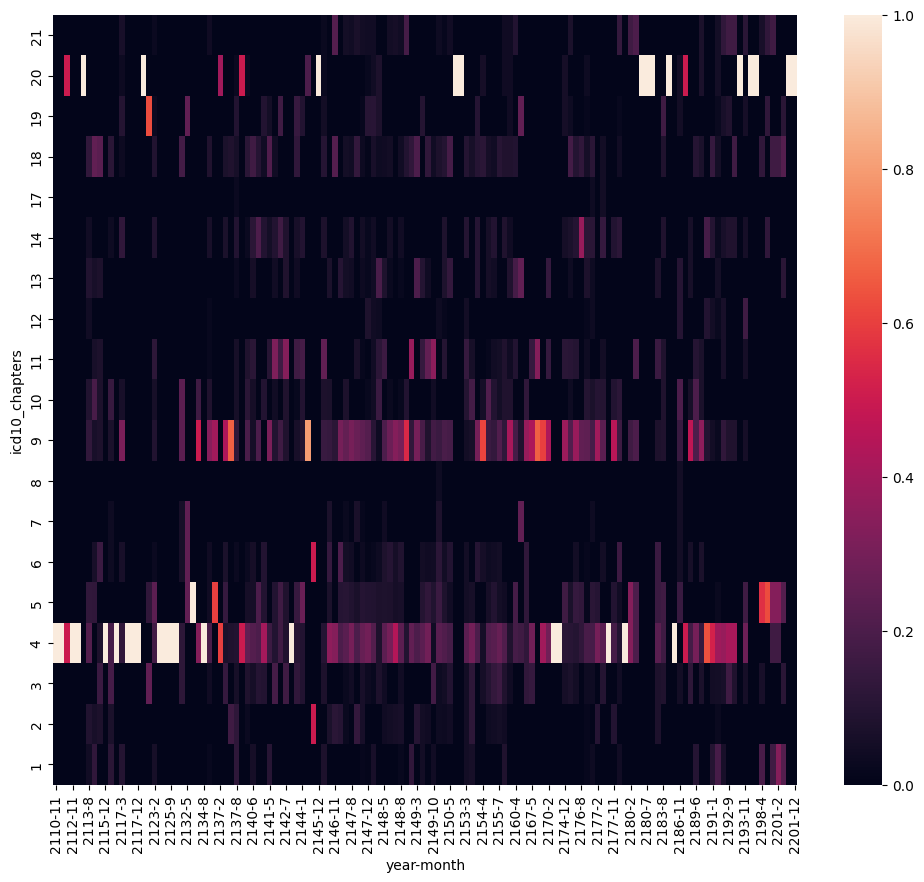

In [30]:
fig, ax = plt.subplots(figsize=(12,10))

plot_df = icd10_chapters_rel_freq.drop('visit_start_date', axis=1).astype('float').T
plot_df.index = plot_df.index.astype('int')


sns.heatmap(plot_df.sort_index(ascending=False), ax=ax)

<Axes: xlabel='year-month', ylabel='ccsr_code'>

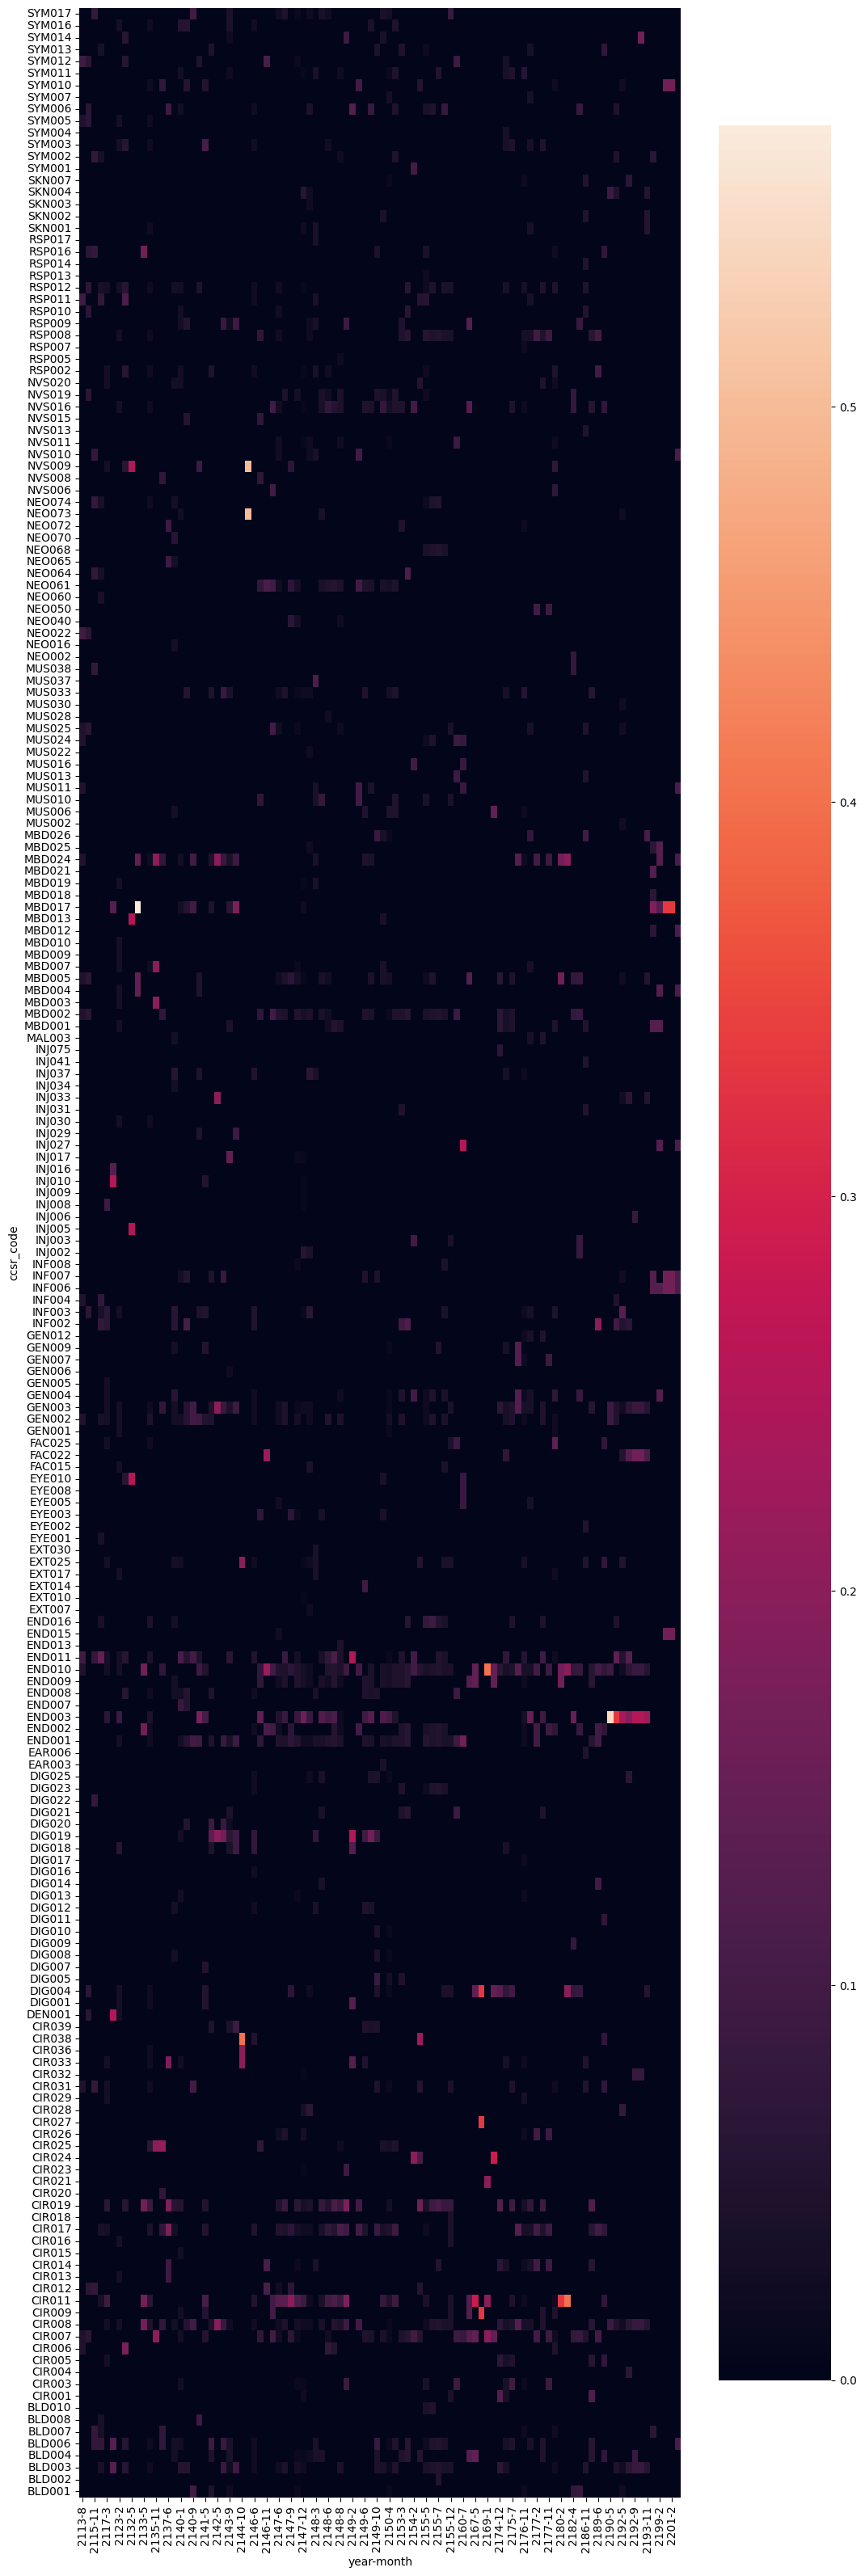

In [ ]:
fig, ax = plt.subplots(figsize=(12,40))

plot_df = cccr_rel_freq.drop('visit_start_date', axis=1).astype('float').T
# plot_df.index = plot_df.index.astype('int')


sns.heatmap(plot_df.sort_index(ascending=False), ax=ax)

In [31]:
diagnostics_df = visit_condition_df[visit_condition_df['ccsr_code'].notnull() & visit_condition_df['icd10_chapters'].notnull()]

structured_df_dict = {}
for chapter in diagnostics_df['icd10_chapters'].unique():
      
    structured_df_dict[chapter] = {'dataframe': diagnostics_df[diagnostics_df['icd10_chapters'] == chapter].drop(['icd10_chapters'], axis=1)}
    ccsr_abs_freq, ccsr_rel_freq = monthly_freq_tables(structured_df_dict[chapter]['dataframe'], 'ccsr_code')                                 
    structured_df_dict[chapter].update({'ccsr_abs_freq': ccsr_abs_freq, 'ccsr_rel_freq': ccsr_rel_freq})

In [32]:
structured_df_dict['4']['dataframe']

,condition_source_value,visit_occurrence_id,visit_start_date,ccsr_code
75,E785,5773706737162663913,2169-01-14,END010
79,E780,5773706737162663913,2169-01-14,END010
178,E7800,1798935802963522191,2133-05-04,END010
181,E119,1798935802963522191,2133-05-04,END002
201,E1165,-4270762634631771871,2149-06-19,END003
...,...,...,...,...
3928,E785,-8810053274755713406,2147-12-29,END010
3937,E119,-9037028963168042376,2147-04-26,END002
3939,E785,-9037028963168042376,2147-04-26,END010
3949,E785,1482978734335253228,2154-04-24,END010


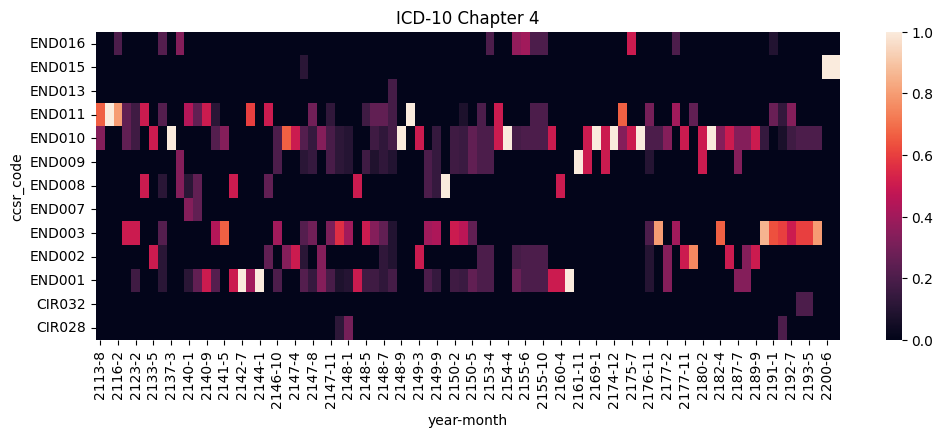

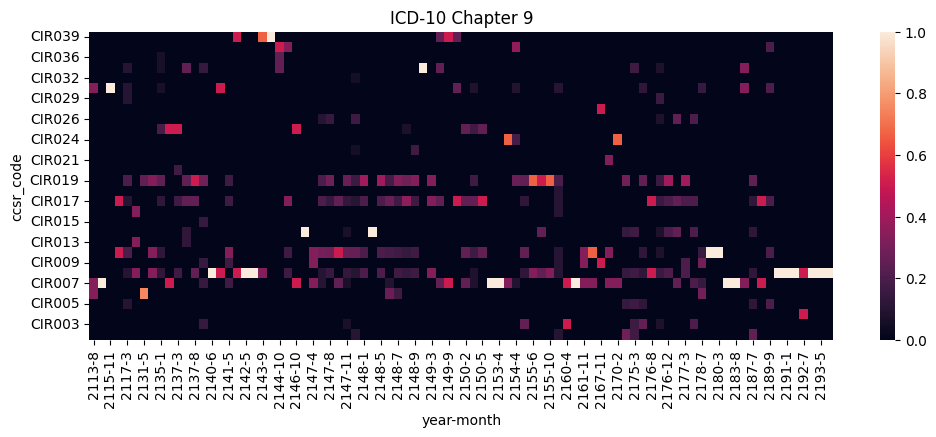

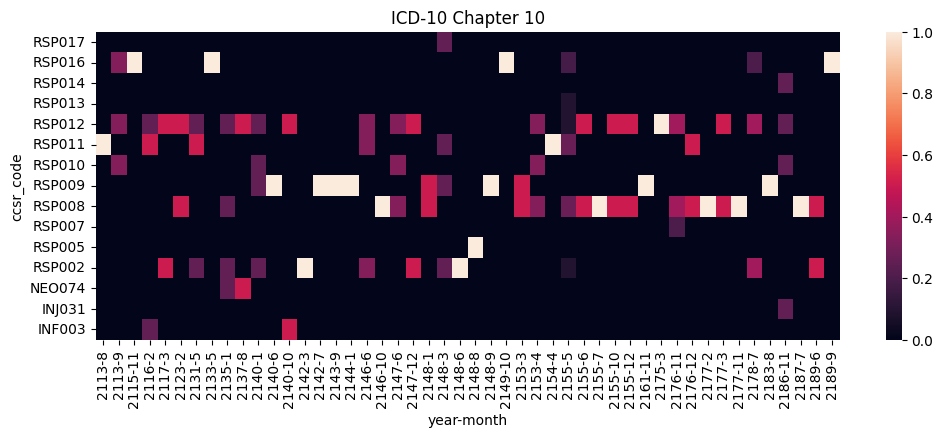

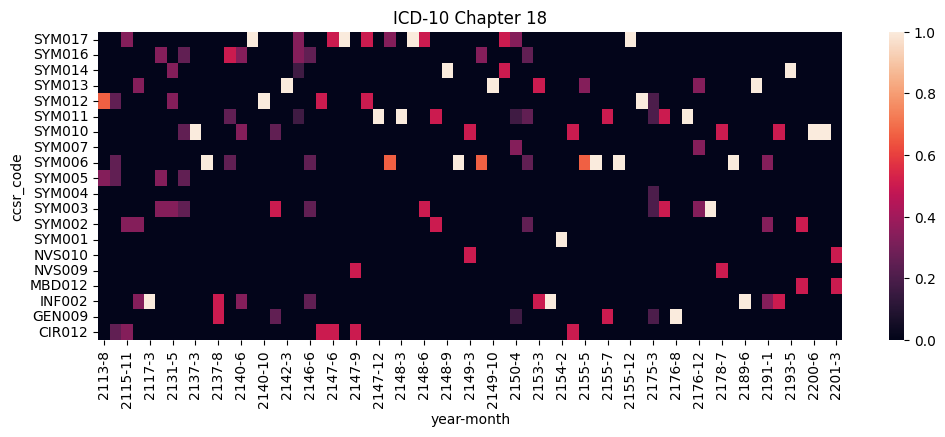

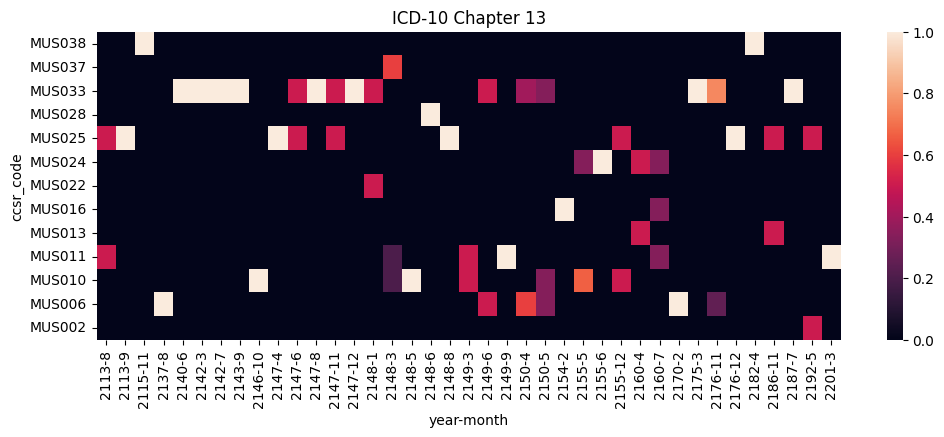

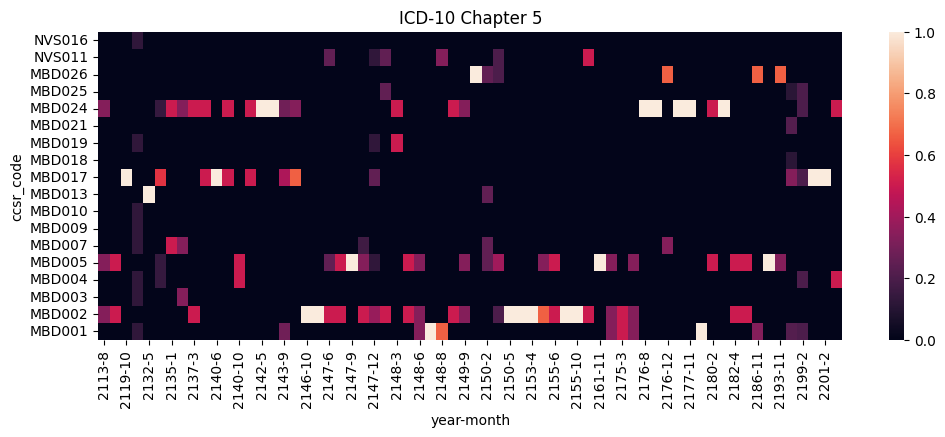

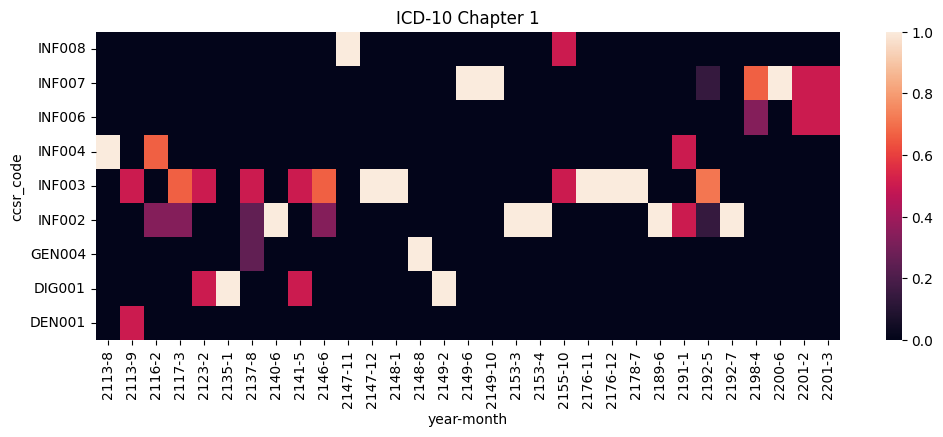

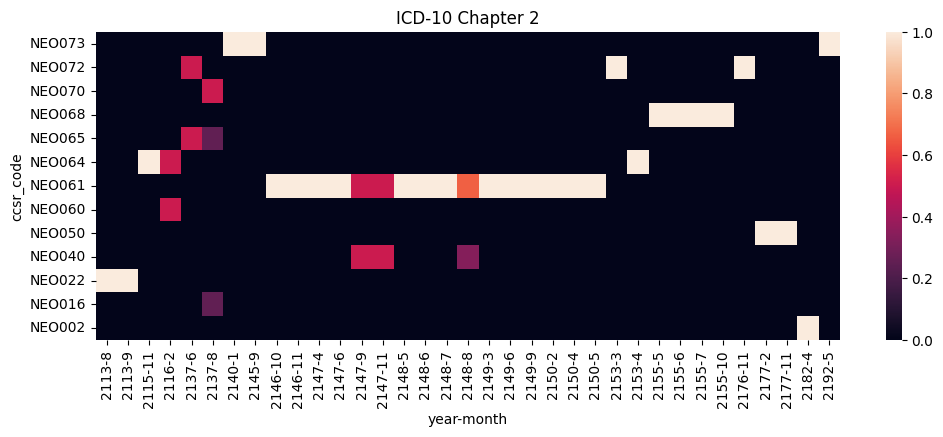

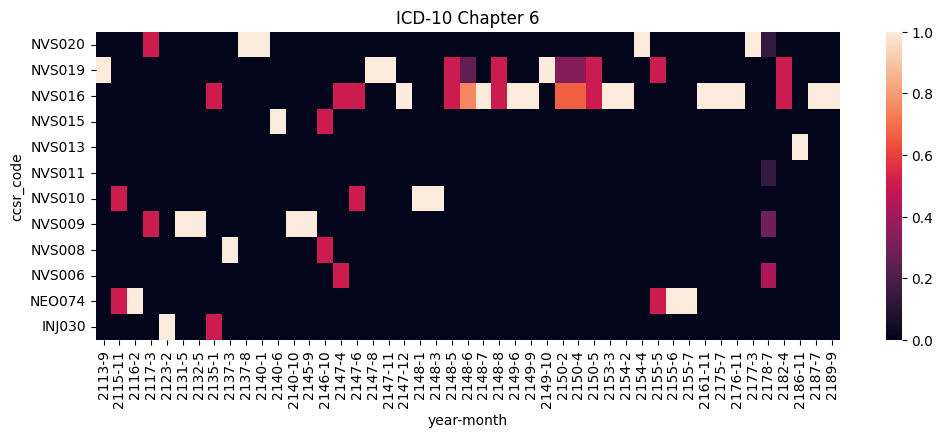

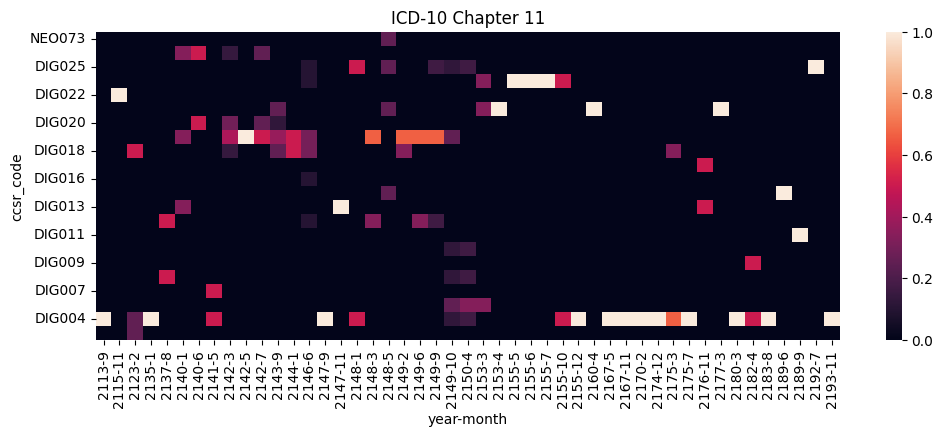

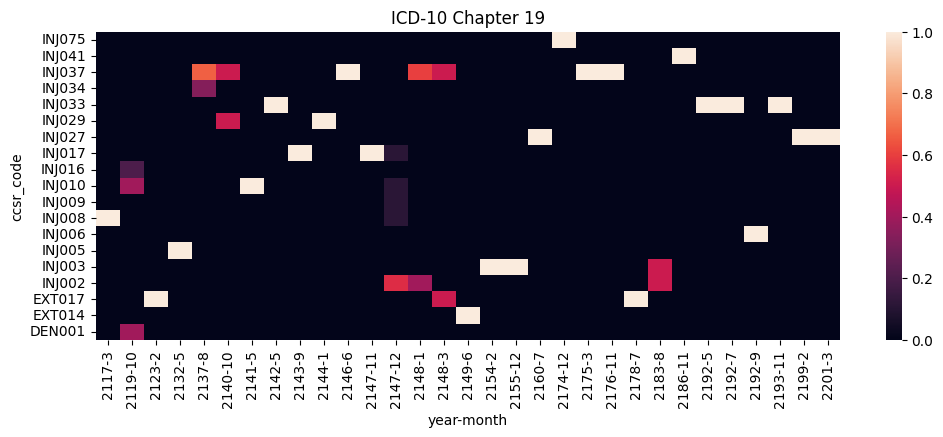

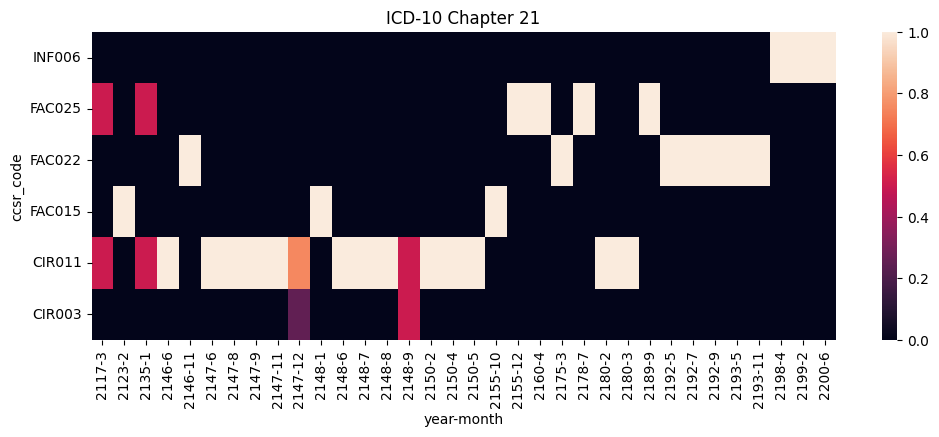

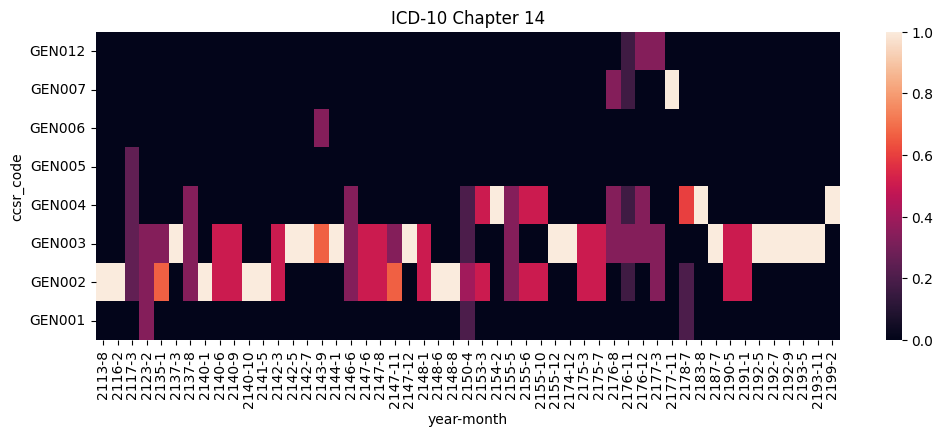

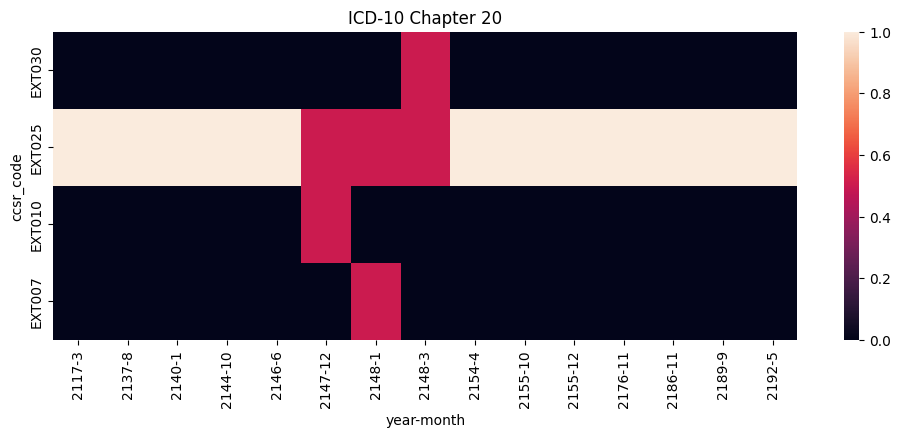

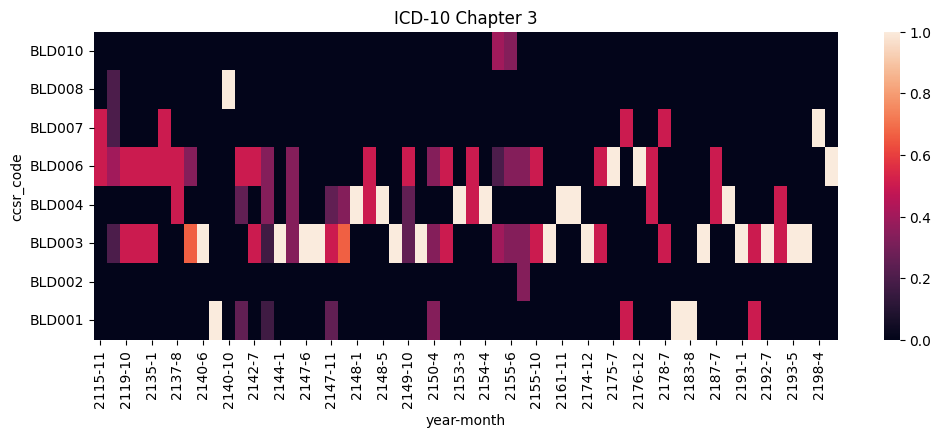

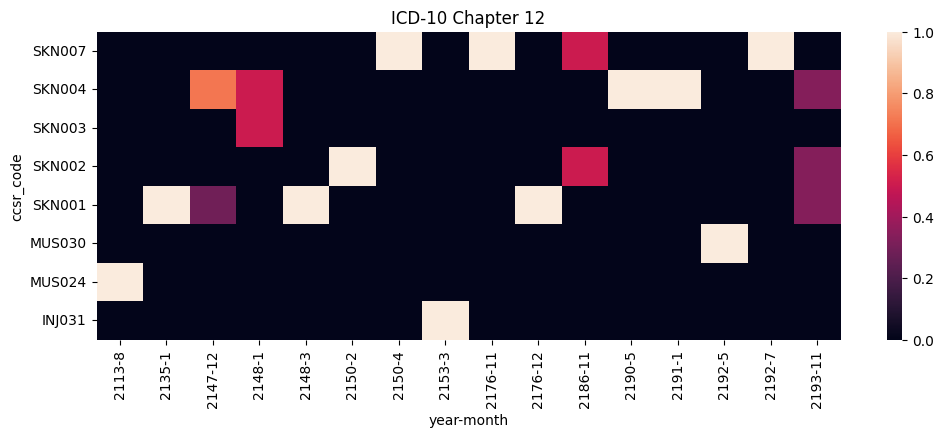

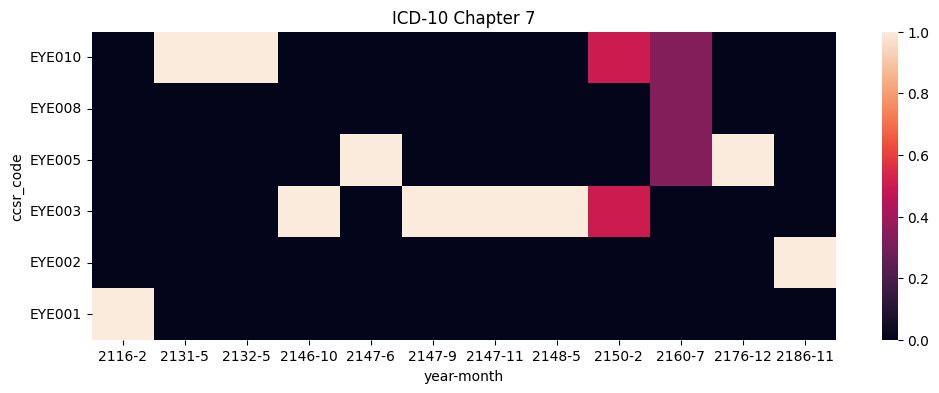

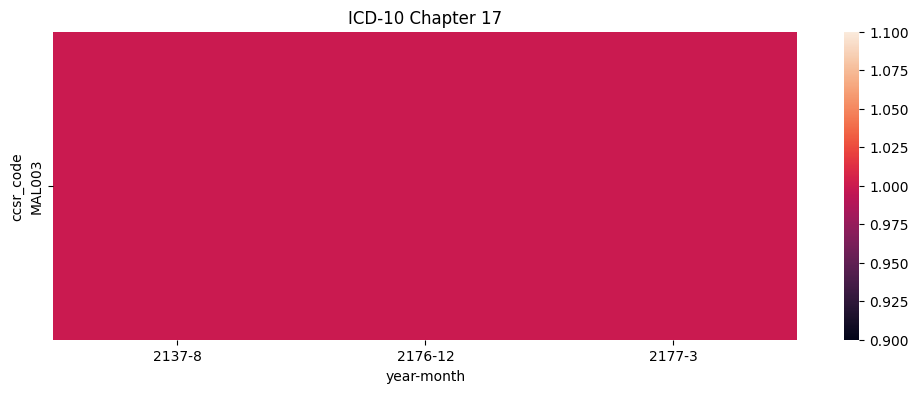

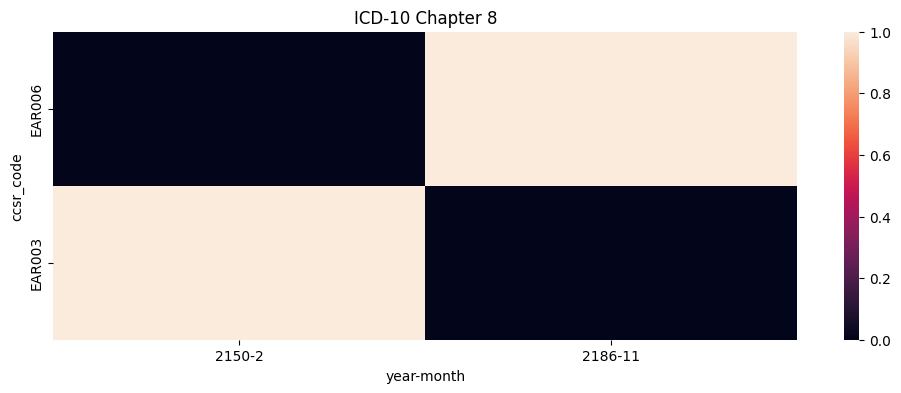

In [34]:
# getting the heatmap for ICD-10 Chapter 4
for chapter, content in structured_df_dict.items():
    
    fig, ax = plt.subplots(figsize=(12,4), )
    plot_df = content['ccsr_rel_freq'].drop('visit_start_date', axis=1).astype('float').T
    plt.title(f'ICD-10 Chapter {chapter}')

    sns.heatmap(plot_df.sort_index(ascending=False), ax=ax)


In [ ]:
ICD10_chapters_mapping= {
    '1':'Certain infectious and parasitic diseases',
    '2':'Neoplasms',
    '3':'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism',
    '4':'Endocrine, nutritional and metabolic diseases',
    '5':'Mental and behavioural disorders',
    '6':'Diseases of the nervous system',
    '7':'Diseases of the eye and adnexa',
    '8':'Diseases of the ear and mastoid process',
    '9':'Diseases of the circulatory system',
    '10':'Diseases of the respiratory system',
    '11':'Diseases of the digestive system',
    '12':'Diseases of the skin and subcutaneous tissue',
    '13':'Diseases of the musculoskeletal system and connective tissue',
    '14':'Diseases of the genitourinary system',
    '15':'Pregnancy, childbirth and the puerperium',
    '16':'Certain conditions originating in the perinatal period',
    '17':'Congenital malformations, deformations and chromosomal abnormalities',
    '18':'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified',
    '19':'Injury, poisoning and certain other consequences of external causes',
    '20':'External causes of morbidity and mortality',
    '21':'Factors influencing health status and contact with health services',
    '22':'Codes for special purposes'
}

In [ ]:
with open('data/mappings/icd10_chapter_description.json', 'w') as fp:
    json.dump(ICD10_chapters_mapping,fp)

In [ ]:
with open('data/mappings/icd10_chapter_description.json', 'r') as fp:
    ICD10_chapters_mapping = json.load(fp)

In [ ]:
ICD10_chapters_mapping

{'1': 'Certain infectious and parasitic diseases',
 '2': 'Neoplasms',
 '3': 'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism',
 '4': 'Endocrine, nutritional and metabolic diseases',
 '5': 'Mental and behavioural disorders',
 '6': 'Diseases of the nervous system',
 '7': 'Diseases of the eye and adnexa',
 '8': 'Diseases of the ear and mastoid process',
 '9': 'Diseases of the circulatory system',
 '10': 'Diseases of the respiratory system',
 '11': 'Diseases of the digestive system',
 '12': 'Diseases of the skin and subcutaneous tissue',
 '13': 'Diseases of the musculoskeletal system and connective tissue',
 '14': 'Diseases of the genitourinary system',
 '15': 'Pregnancy, childbirth and the puerperium',
 '16': 'Certain conditions originating in the perinatal period',
 '17': 'Congenital malformations, deformations and chromosomal abnormalities',
 '18': 'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified

In [41]:
with open('data/mappings/icd10_codes.json', 'r') as fp:
    ICD_diagnoses_mapping = json.load(fp)
    
icd10_code_descriptors_dict = {x['code']: x['desc'] for x in ICD_diagnoses_mapping}

In [43]:
icd10_code_descriptors_dict

{'A000': 'Cholera due to Vibrio cholerae 01, biovar cholerae',
 'A001': 'Cholera due to Vibrio cholerae 01, biovar eltor',
 'A009': 'Cholera, unspecified',
 'A0100': 'Typhoid fever, unspecified',
 'A0101': 'Typhoid meningitis',
 'A0102': 'Typhoid fever with heart involvement',
 'A0103': 'Typhoid pneumonia',
 'A0104': 'Typhoid arthritis',
 'A0105': 'Typhoid osteomyelitis',
 'A0109': 'Typhoid fever with other complications',
 'A011': 'Paratyphoid fever A',
 'A012': 'Paratyphoid fever B',
 'A013': 'Paratyphoid fever C',
 'A014': 'Paratyphoid fever, unspecified',
 'A020': 'Salmonella enteritis',
 'A021': 'Salmonella sepsis',
 'A0220': 'Localized salmonella infection, unspecified',
 'A0221': 'Salmonella meningitis',
 'A0222': 'Salmonella pneumonia',
 'A0223': 'Salmonella arthritis',
 'A0224': 'Salmonella osteomyelitis',
 'A0225': 'Salmonella pyelonephritis',
 'A0229': 'Salmonella with other localized infection',
 'A028': 'Other specified salmonella infections',
 'A029': 'Salmonella infectio

In [46]:
icd9_code_descriptors_dict = {x['icd9code']: x['long_description'] for x in pd.read_csv('data/mappings/icd9-descriptions.csv', encoding='latin-1').to_dict(orient='records')}
icd9_code_descriptors_dict

{'001.0': 'Cholera due to vibrio cholerae',
 '001.1': 'Cholera due to vibrio cholerae el tor',
 '001.9': 'Cholera - unspecified',
 '002.0': 'Typhoid fever',
 '002.1': 'Paratyphoid fever A',
 '002.2': 'Paratyphoid fever B',
 '002.3': 'Paratyphoid fever C',
 '002.9': 'Paratyphoid fever - unspecified',
 '003.0': 'Salmonella gastroenteritis',
 '003.1': 'Salmonella septicemia',
 '003.20': 'Localized salmonella infection - unspecified',
 '003.21': 'Salmonella meningitis',
 '003.22': 'Salmonella pneumonia',
 '003.23': 'Salmonella arthritis',
 '003.24': 'Salmonella osteomyelitis',
 '003.29': 'Other localized salmonella infections',
 '003.8': 'Other specified salmonella infections',
 '003.9': 'Salmonella infection - unspecified',
 '004.0': 'Shigella dysenteriae',
 '004.1': 'Shigella flexneri',
 '004.2': 'Shigella boydii',
 '004.3': 'Shigella sonnei',
 '004.8': 'Other specified shigella infections',
 '004.9': 'Shigellosis - unspecified',
 '005.0': 'Staphylococcal food poisoning',
 '005.1': 'Botu